<a href="https://colab.research.google.com/github/aks32003/Malaria_Project/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.measure import regionprops

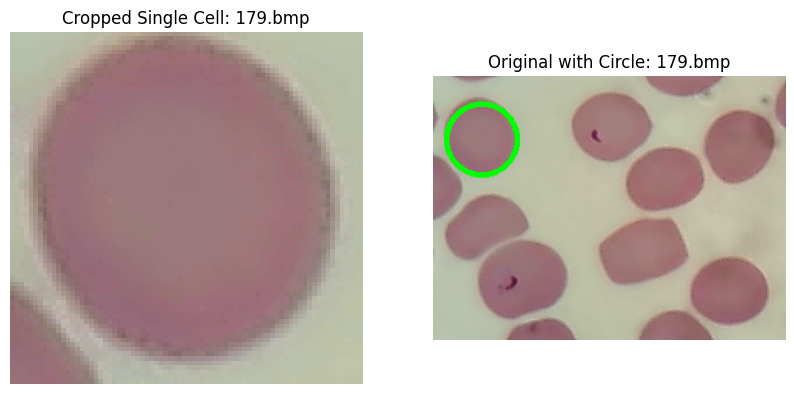

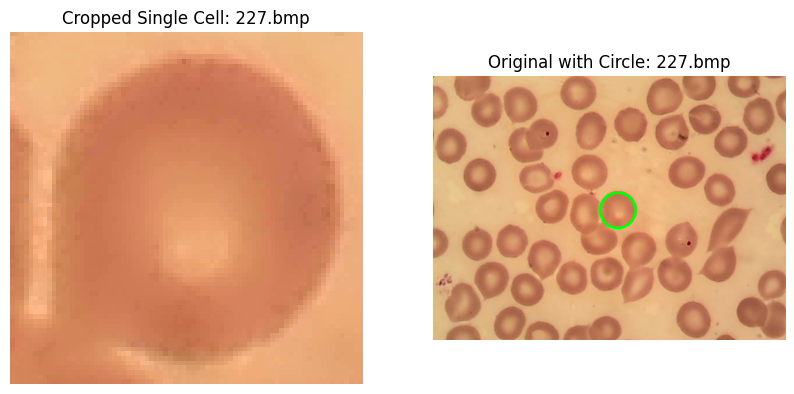

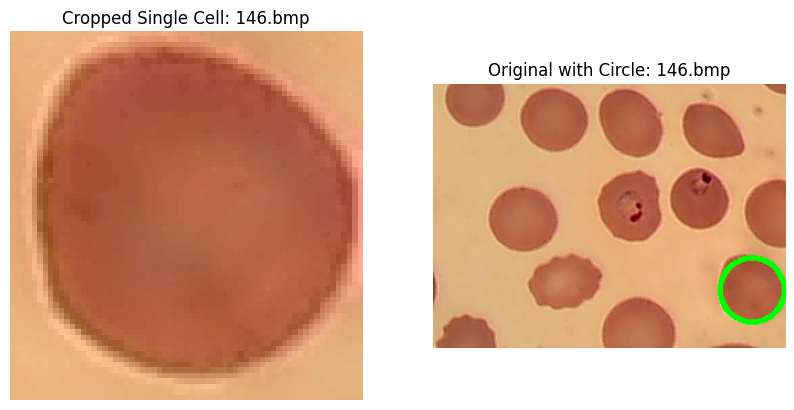

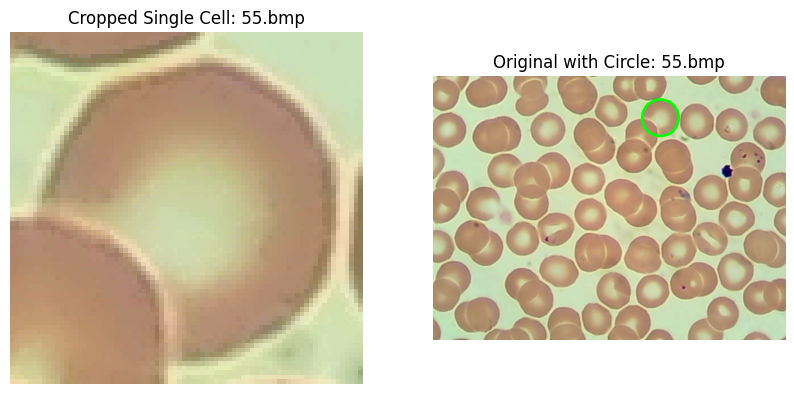

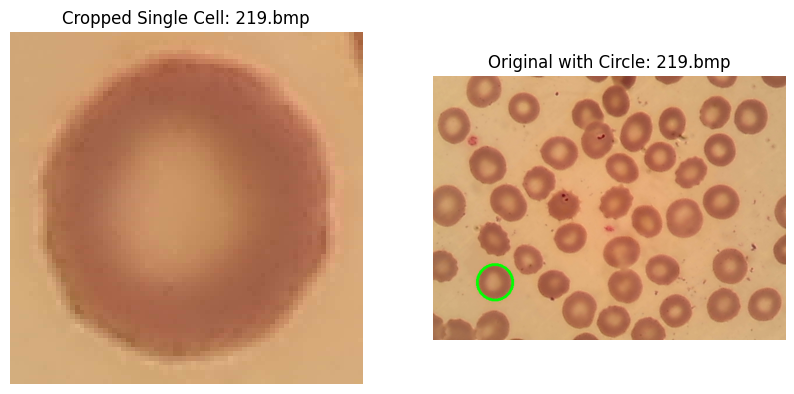

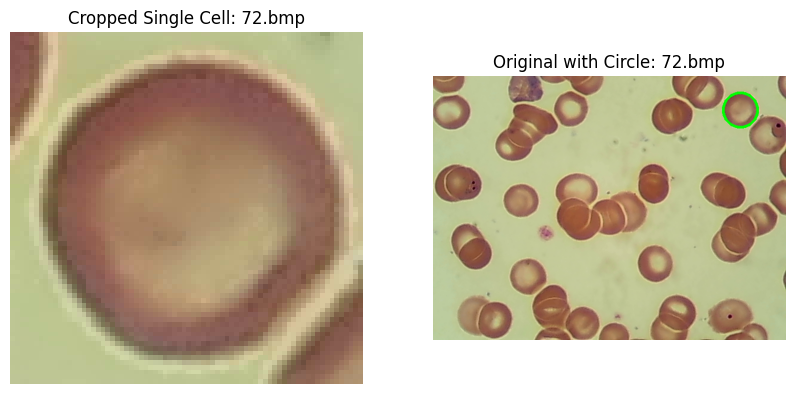

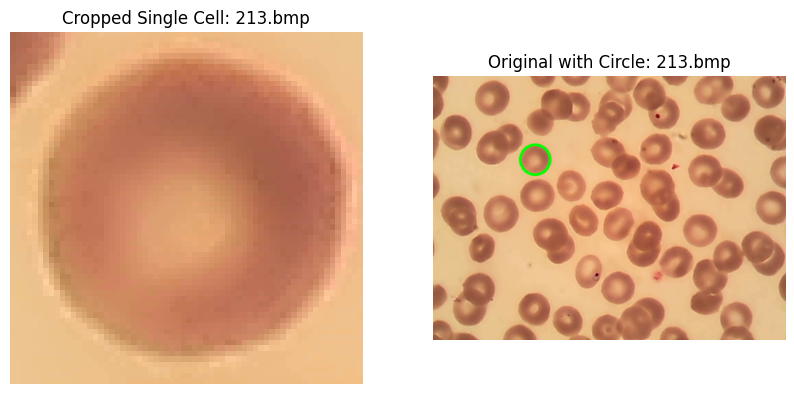

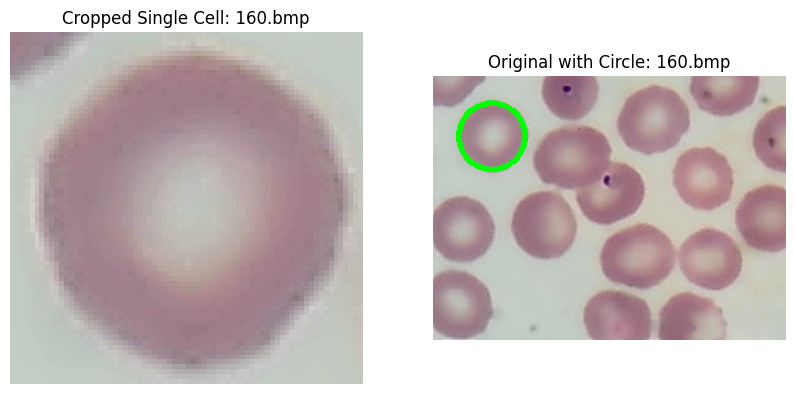

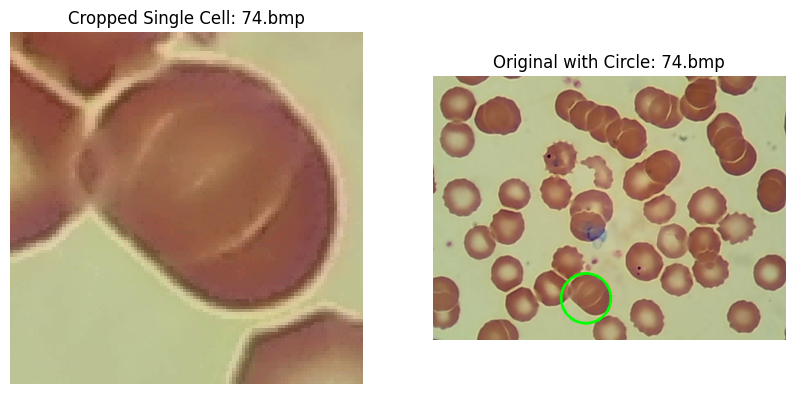

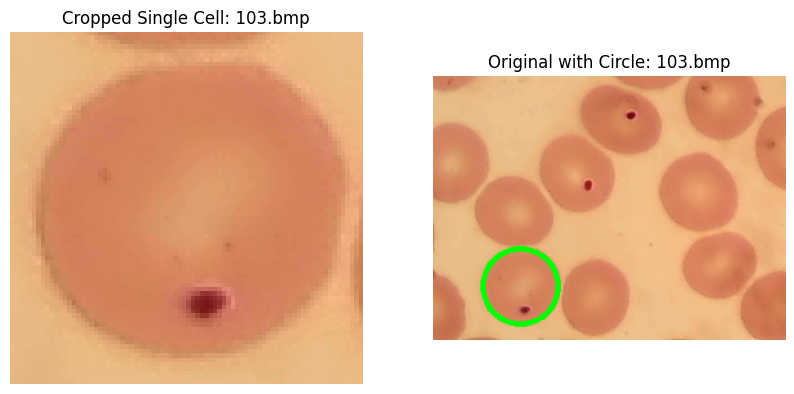

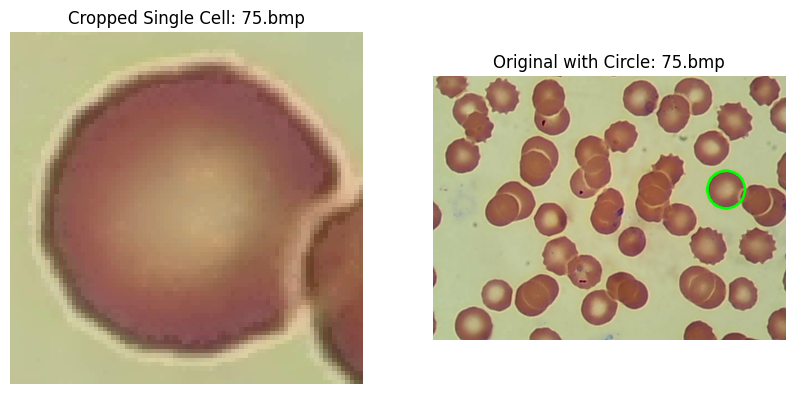

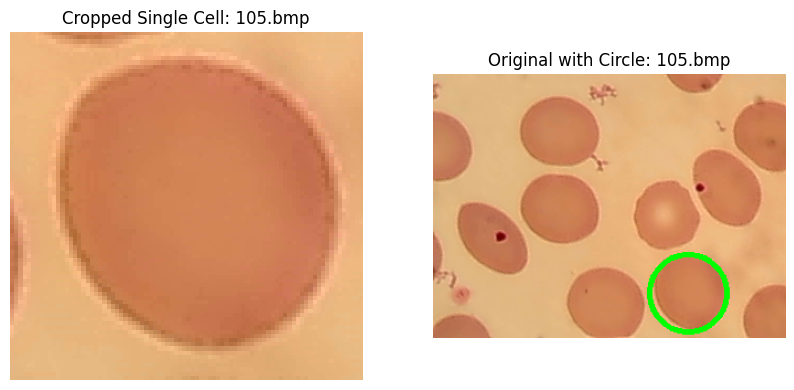

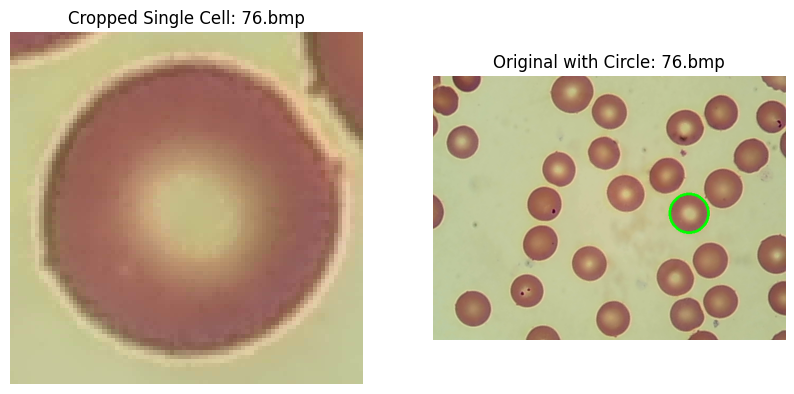

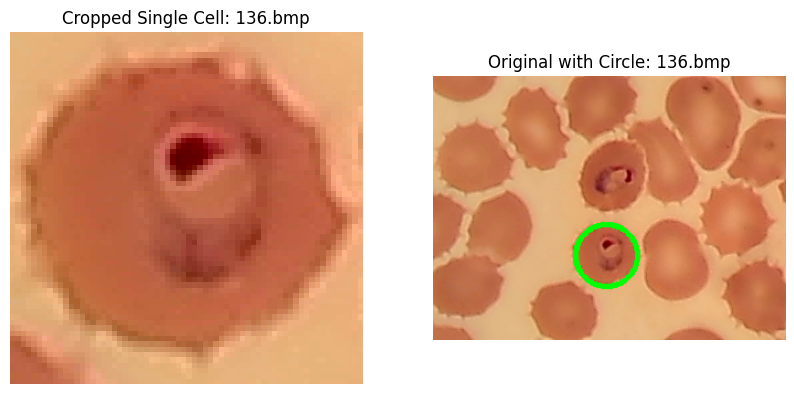

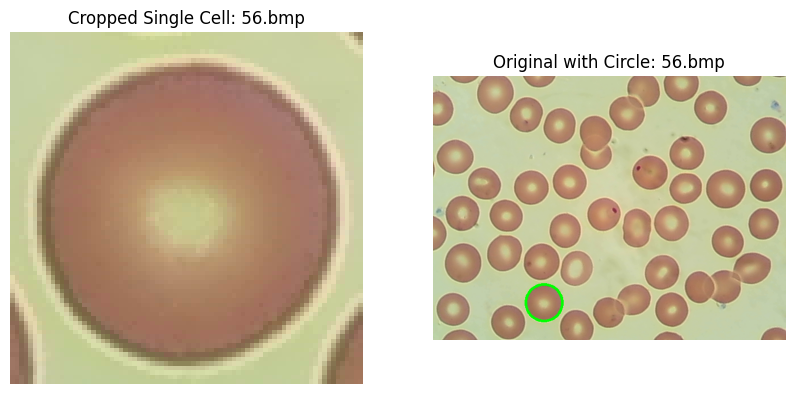

In [24]:
# Define the path to the folder containing the images
folder_path = '/content/Malaria Images/MP/'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.bmp')]

def non_overlapping_circles(circles, min_distance):
    """Filter out overlapping circles based on a minimum distance between centers."""
    filtered_circles = []
    for circle in circles:
        x, y, r = circle
        overlap = False
        for existing_circle in filtered_circles:
            ex, ey, er = existing_circle
            distance = np.sqrt((x - ex) ** 2 + (y - ey) ** 2)
            if distance < min_distance:
                overlap = True
                break
        if not overlap:
            filtered_circles.append(circle)
    return filtered_circles

# Loop through each image file in the folder
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a median filter to reduce noise
    median_filtered = cv2.medianBlur(gray, 5)

    # Detect circles in the image using HoughCircles
    circles = cv2.HoughCircles(median_filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=50)

    # Ensure at least one circle was found
    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype("int")

        # Filter out overlapping circles
        min_distance = 1.5  # Adjust distance threshold if needed
        filtered_circles = non_overlapping_circles(circles, min_distance)

        # Process each non-overlapping circle
        for (x, y, r) in filtered_circles:
            # Crop the image to a tighter bounding box around the circle
            crop_margin = int(r * 0.2)  # Tighter margin to zoom in more
            crop_x_start = max(x - r - crop_margin, 0)
            crop_x_end = min(x + r + crop_margin, image.shape[1])
            crop_y_start = max(y - r - crop_margin, 0)
            crop_y_end = min(y + r + crop_margin, image.shape[0])
            cropped_image = image[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

            # Draw the circle on the original image (optional)
            output = image.copy()
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)

            # Display the cropped image of the single cell
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Cropped Single Cell: {image_file}')
            plt.axis('off')

            # Display the original image with the circle drawn
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
            plt.title(f'Original with Circle: {image_file}')
            plt.axis('off')

            plt.show()
            break  # Only process the first valid circle found
    else:
        print(f"No circles were found in {image_file}")


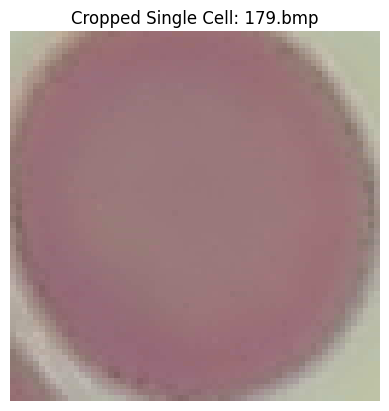

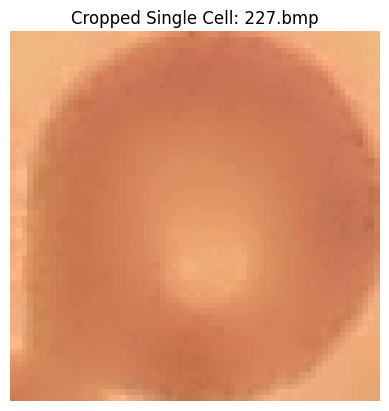

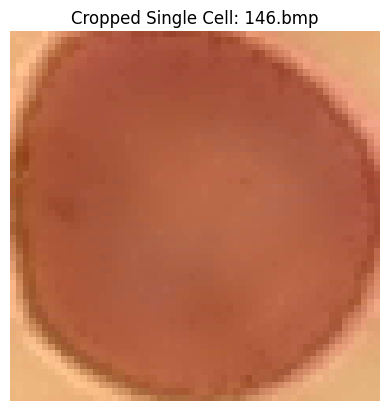

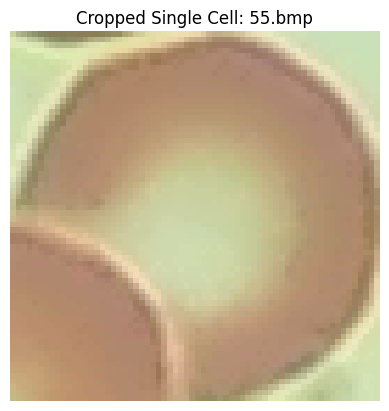

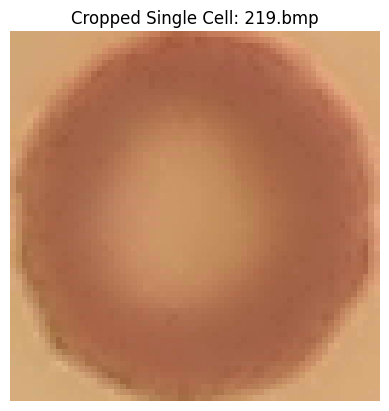

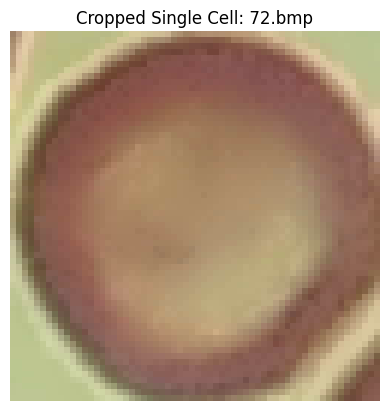

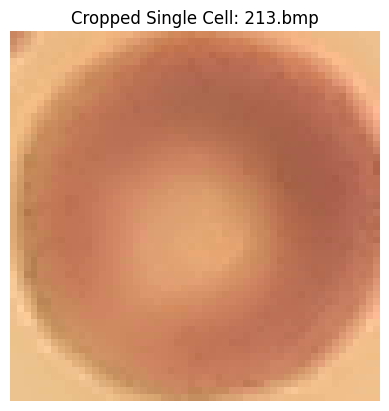

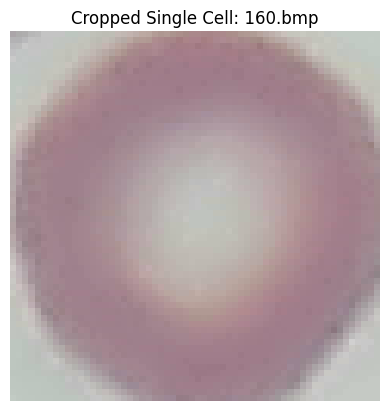

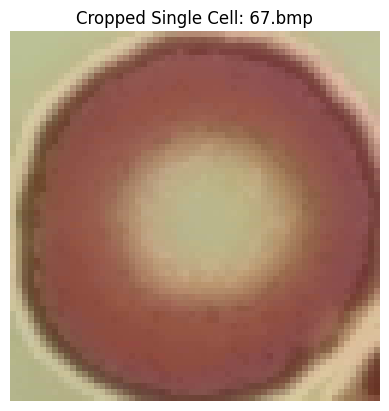

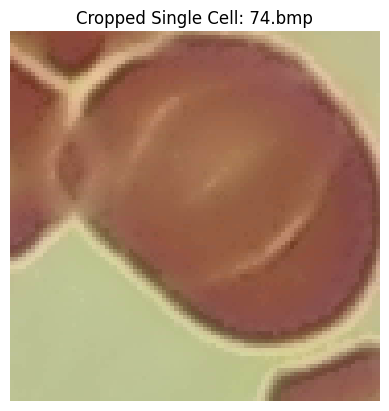

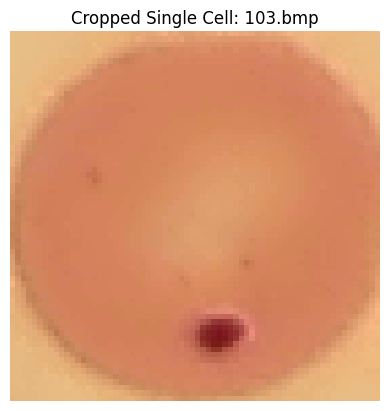

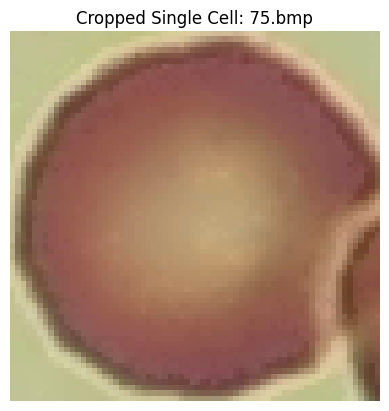

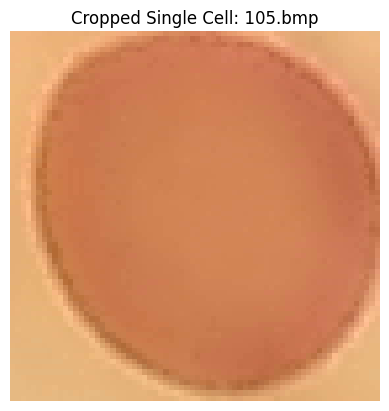

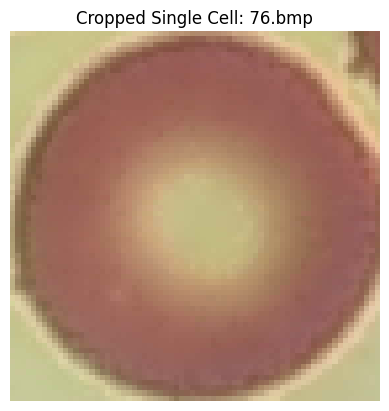

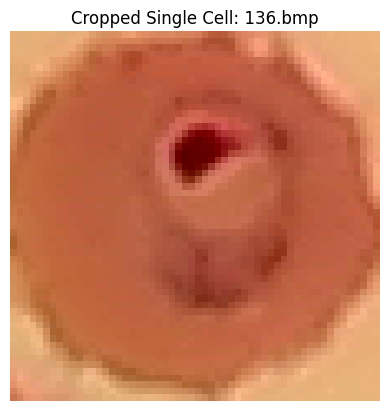

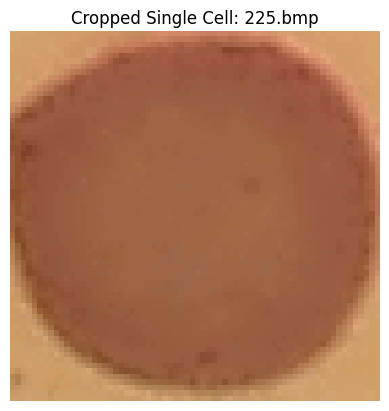

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the folder containing the images
folder_path = '/content/Malaria Images/MP/'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.bmp')]

# Loop through each image file in the folder
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a median filter to reduce noise
    median_filtered = cv2.medianBlur(gray, 5)

    # Detect circles in the image using HoughCircles
    circles = cv2.HoughCircles(median_filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=50)

    # Ensure at least one circle was found
    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype("int")

        # Get the first circle (largest or most prominent one)
        x, y, r = circles[0]

        # Crop the image to the bounding box of the circle
        cropped_image = image[y-r:y+r, x-r:x+r]

        # Draw the circle on the original image (optional)
        output = image.copy()
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

        # Display the cropped image of the single cell
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Cropped Single Cell: {image_file}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No circles were found in {image_file}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the folder containing the images
folder_path = '/content/Malaria Images/MP/'

# Desired size for all output images
output_size = (150, 150)  # Increased size for better detail

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.bmp')]

# Loop through each image file in the folder
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a larger median filter to reduce noise
    median_filtered = cv2.medianBlur(gray, 7)  # Increased filter size

    # Detect circles in the image using HoughCircles with adjusted parameters
    circles = cv2.HoughCircles(median_filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=25, minRadius=10, maxRadius=60)

    # Ensure at least one circle was found
    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype("int")

        # Initialize variables to store the best circle found
        selected_circle = None

        # Loop through each detected circle
        for (x, y, r) in circles:
            # Check if the circle fits entirely within the image
            if x - r >= 0 and y - r >= 0 and x + r <= image.shape[1] and y + r <= image.shape[0]:
                selected_circle = (x, y, r)
                break  # Choose the first circle that fits entirely within the image

        # If a valid circle was found
        if selected_circle is not None:
            x, y, r = selected_circle

            # Crop the image to a larger bounding box around the circle
            crop_margin = int(r * 1.5)  # Increase margin to include more of the cell
            crop_x_start = max(x - r - crop_margin, 0)
            crop_x_end = min(x + r + crop_margin, image.shape[1])
            crop_y_start = max(y - r - crop_margin, 0)
            crop_y_end = min(y + r + crop_margin, image.shape[0])
            cropped_image = image[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

            # Resize the cropped image to the desired output size
            resized_image = cv2.resize(cropped_image, output_size)

            # Convert the resized image to grayscale
            gray_resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

            # Apply GaussianBlur to smooth the image
            blurred = cv2.GaussianBlur(gray_resized_image, (5, 5), 0)

            # Apply Otsu's thresholding
            _, otsu_threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Morphological operations to remove small noise and fill holes
            kernel = np.ones((3, 3), np.uint8)
            morph_open = cv2.morphologyEx(otsu_threshold, cv2.MORPH_OPEN, kernel, iterations=2)
            sure_bg = cv2.dilate(morph_open, kernel, iterations=3)

            # Distance transform and thresholding to find sure foreground
            dist_transform = cv2.distanceTransform(morph_open, cv2.DIST_L2, 5)
            _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
            sure_fg = np.uint8(sure_fg)
            unknown = cv2.subtract(sure_bg, sure_fg)

            # Marker labeling
            _, markers = cv2.connectedComponents(sure_fg)

            # Add one to all labels so that sure background is not 0, but 1
            markers = markers + 1

            # Mark the region of unknown with zero
            markers[unknown == 255] = 0

            # Apply the watershed algorithm
            markers = cv2.watershed(resized_image, markers)

            # Mark the outer boundary in blue (only outer boundary)
            resized_image[markers == -1] = [0, 0, 255]  # Blue color for boundary

            # Display the image with watershed boundary
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.title(f'Watershed Boundary: {image_file}')
            plt.axis('off')
            plt.show()

            # Optionally, save the watershed image to disk
            # output_path = os.path.join('/path/to/save/folder', f'watershed_{image_file}')
            # cv2.imwrite(output_path, cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR))
        else:
            print(f"No valid cell found in {image_file} without overlap")
    else:
        print(f"No circles were found in {image_file}")


In [22]:

# Define the path to the folder containing the images
folder_path = '/content/Malaria Images/MP/'
output_folder = '/content/Malaria Images/Output/'  # Path to save the extracted cell images

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Desired size for all output images
output_size = (150, 150)  # Increased size for better detail

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.bmp')]

# Loop through each image file in the folder
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a larger median filter to reduce noise
    median_filtered = cv2.medianBlur(gray, 7)  # Increased filter size

    # Detect circles in the image using HoughCircles with adjusted parameters
    circles = cv2.HoughCircles(median_filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=25, minRadius=10, maxRadius=60)

    # Ensure at least one circle was found
    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype("int")

        # Select the first valid circle
        for (x, y, r) in circles:
            # Check if the circle fits entirely within the image
            if x - r >= 0 and y - r >= 0 and x + r <= image.shape[1] and y + r <= image.shape[0]:
                # Crop the image to a tighter bounding box around the circle
                crop_margin = int(r * 0.75)  # Tighter margin to zoom in more
                crop_x_start = max(x - r - crop_margin, 0)
                crop_x_end = min(x + r + crop_margin, image.shape[1])
                crop_y_start = max(y - r - crop_margin, 0)
                crop_y_end = min(y + r + crop_margin, image.shape[0])
                cropped_image = image[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

                # Resize the cropped image to the desired output size
                resized_image = cv2.resize(cropped_image, output_size)

                # Convert the resized image to grayscale for watershed
                gray_resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

                # Apply GaussianBlur to smooth the image
                blurred = cv2.GaussianBlur(gray_resized_image, (5, 5), 0)

                # Apply Otsu's thresholding
                _, otsu_threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                # Morphological operations to remove small noise and fill holes
                kernel = np.ones((3, 3), np.uint8)
                morph_open = cv2.morphologyEx(otsu_threshold, cv2.MORPH_OPEN, kernel, iterations=2)
                sure_bg = cv2.dilate(morph_open, kernel, iterations=3)

                # Distance transform and thresholding to find sure foreground
                dist_transform = cv2.distanceTransform(morph_open, cv2.DIST_L2, 5)
                _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
                sure_fg = np.uint8(sure_fg)
                unknown = cv2.subtract(sure_bg, sure_fg)

                # Marker labeling
                _, markers = cv2.connectedComponents(sure_fg)

                # Add one to all labels so that sure background is not 0, but 1
                markers = markers + 1

                # Mark the region of unknown with zero
                markers[unknown == 255] = 0

                # Apply the watershed algorithm
                markers = cv2.watershed(resized_image, markers)

                # Mark the outer boundary in red
                resized_image[markers == -1] = [0, 0, 255]  # Red color for boundary

                # Save the image with watershed boundary
                output_path = os.path.join(output_folder, f'cell_{image_file}')
                cv2.imwrite(output_path, resized_image)

                print(f"Saved cell image for {image_file} as {output_path}")
                break  # Only process the first valid circle found
        else:
            print(f"No full circular boundary found in {image_file}")
    else:
        print(f"No circles were found in {image_file}")


Saved cell image for 220.bmp as /content/Malaria Images/Output/cell_220.bmp
Saved cell image for 179.bmp as /content/Malaria Images/Output/cell_179.bmp
Saved cell image for 227.bmp as /content/Malaria Images/Output/cell_227.bmp
Saved cell image for 146.bmp as /content/Malaria Images/Output/cell_146.bmp
Saved cell image for 55.bmp as /content/Malaria Images/Output/cell_55.bmp
Saved cell image for 219.bmp as /content/Malaria Images/Output/cell_219.bmp
Saved cell image for 72.bmp as /content/Malaria Images/Output/cell_72.bmp
Saved cell image for 213.bmp as /content/Malaria Images/Output/cell_213.bmp
Saved cell image for 196.bmp as /content/Malaria Images/Output/cell_196.bmp
Saved cell image for 160.bmp as /content/Malaria Images/Output/cell_160.bmp
Saved cell image for 67.bmp as /content/Malaria Images/Output/cell_67.bmp
Saved cell image for 74.bmp as /content/Malaria Images/Output/cell_74.bmp
Saved cell image for 103.bmp as /content/Malaria Images/Output/cell_103.bmp
Saved cell image for

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the folder containing the images
folder_path = '/content/Malaria Images/MP/'
output_folder = '/content/Malaria Images/Output/'  # Path to save the extracted cell images

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Desired size for all output images
output_size = (150, 150)  # Increased size for better detail

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.bmp')]

# Loop through each image file in the folder
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a larger median filter to reduce noise
    median_filtered = cv2.medianBlur(gray, 7)  # Increased filter size

    # Detect circles in the image using HoughCircles with adjusted parameters
    circles = cv2.HoughCircles(median_filtered, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=25, minRadius=10, maxRadius=60)

    # Ensure at least one circle was found
    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype("int")

        # Select the first valid circle
        for (x, y, r) in circles:
            # Check if the circle fits entirely within the image
            if x - r >= 0 and y - r >= 0 and x + r <= image.shape[1] and y + r <= image.shape[0]:
                # Crop the image to a tighter bounding box around the circle
                crop_margin = int(r * 0.75)  # Tighter margin to zoom in more
                crop_x_start = max(x - r - crop_margin, 0)
                crop_x_end = min(x + r + crop_margin, image.shape[1])
                crop_y_start = max(y - r - crop_margin, 0)
                crop_y_end = min(y + r + crop_margin, image.shape[0])
                cropped_image = image[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

                # Resize the cropped image to the desired output size
                resized_image = cv2.resize(cropped_image, output_size)

                # Convert the resized image to grayscale for watershed
                gray_resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

                # Apply GaussianBlur to smooth the image
                blurred = cv2.GaussianBlur(gray_resized_image, (3, 3), 0)

                # Apply Otsu's thresholding
                _, otsu_threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

                # Morphological operations to remove small noise and fill holes
                kernel = np.ones((3, 3), np.uint8)
                morph_open = cv2.morphologyEx(otsu_threshold, cv2.MORPH_OPEN, kernel, iterations=2)
                sure_bg = cv2.dilate(morph_open, kernel, iterations=3)

                # Distance transform and thresholding to find sure foreground
                dist_transform = cv2.distanceTransform(morph_open, cv2.DIST_L2, 5)
                _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
                sure_fg = np.uint8(sure_fg)
                unknown = cv2.subtract(sure_bg, sure_fg)

                # Marker labeling
                _, markers = cv2.connectedComponents(sure_fg)

                # Add one to all labels so that sure background is not 0, but 1
                markers = markers + 1

                # Mark the region of unknown with zero
                markers[unknown == 255] = 0

                # Apply the watershed algorithm
                markers = cv2.watershed(resized_image, markers)

                # Mark the outer boundary in red
                resized_image[markers == -1] = [0, 0, 255]  # Red color for boundary

                # Save the image with watershed boundary
                output_path = os.path.join(output_folder, f'cell_{image_file}')
                cv2.imwrite(output_path, resized_image)

                print(f"Saved cell image for {image_file} as {output_path}")
                break  # Only process the first valid circle found
        else:
            print(f"No full circular boundary found in {image_file}")
    else:
        print(f"No circles were found in {image_file}")


Saved cell image for 220.bmp as /content/Malaria Images/Output/cell_220.bmp
Saved cell image for 179.bmp as /content/Malaria Images/Output/cell_179.bmp
Saved cell image for 227.bmp as /content/Malaria Images/Output/cell_227.bmp
Saved cell image for 146.bmp as /content/Malaria Images/Output/cell_146.bmp
Saved cell image for 55.bmp as /content/Malaria Images/Output/cell_55.bmp
Saved cell image for 219.bmp as /content/Malaria Images/Output/cell_219.bmp
Saved cell image for 72.bmp as /content/Malaria Images/Output/cell_72.bmp
Saved cell image for 213.bmp as /content/Malaria Images/Output/cell_213.bmp
Saved cell image for 196.bmp as /content/Malaria Images/Output/cell_196.bmp
Saved cell image for 160.bmp as /content/Malaria Images/Output/cell_160.bmp
Saved cell image for 67.bmp as /content/Malaria Images/Output/cell_67.bmp
Saved cell image for 74.bmp as /content/Malaria Images/Output/cell_74.bmp
Saved cell image for 103.bmp as /content/Malaria Images/Output/cell_103.bmp
Saved cell image for